# Assignment 6

Welcome to the assignment for week 6.

## Task 6: Viola & Jones

### Ex. 6.1 Rectangular Features

* Implement the construction of all 2-rect features (horizontal and vertical) within a given window (like the 24x24 px window from the paper)
* How many exist? **(RESULT)** 
* Display three of these overlaid onto an image of a face. **(RESULT)**

In [3]:
# 2 rect characterize by (x- left top corner point, y- , width, height, axis, parity) # axis = 0: horizontal, axis = 1: vertical

def getALLRectangles(img):
    img_height, img_width = img.shape
    rects = []
    
    for y_ref_point in range(img_height):
        for x_ref_point in range(img_width):
            for width in range(img_width - x_ref_point - 1): # think have to subtract 1
                for height in range(img_height - y_ref_point - 1): # think have to subtract 1
                    for parity in range(2):
                        for axis in range(2):
                            rects.append({'x': x_ref_point, 'y': y_ref_point, 'width': width, 'height': height, 'axis': axis, 'parity':parity})
                    
    return rects

In [4]:
import numpy as np
image = np.zeros((24, 24))

rects = getALLRectangles(image)
print(f'There are {len(rects)} different 2-rects!')

There are 304704 different 2-rects!


In [27]:
def putRectangle(image, rect):
    xRange,yRange, _ = image.shape
    if rect['x'] + rect['width'] > xRange or rect['y'] + rect['height'] > yRange or rect['x'] < 0 or rect['y'] < 0:
        print('Rectangle is out of range!')
        
        return  
    
    result = np.copy(image)
    heightOffset = 0
    widthOffset = 0
        
    if rect['axis'] == 0:
        
        widthOffset = rect['width'] % 2
        width = rect['width']//2
        height = rect['height']
        
        # case 1|0
        if rect['parity'] == 0: 
            cornerWhiteX = rect['x']
            cornerWhiteY = rect['y']
            cornerBlackX = rect['x'] + rect['width']//2
            cornerBlackY = rect['y']
        # case 0|1
        else:                    
            cornerWhiteX = rect['x'] + rect['width']//2
            cornerWhiteY = rect['y']
            cornerBlackX = rect['x']
            cornerBlackY = rect['y']
    else:
        width = rect['width']
        height = rect['height']//2
        heightOffset = rect['height'] % 2
        
        # case 1/0
        if rect['parity'] == 0:
            cornerWhiteX = rect['x']
            cornerWhiteY = rect['y']
            cornerBlackX = rect['x']
            cornerBlackY = rect['y'] + rect['height']//2
        # case 0/1
        else:
            cornerWhiteX = rect['x']
            cornerWhiteY = rect['y'] + rect['height']//2
            cornerBlackX = rect['x']
            cornerBlackY = rect['y']
    
    # color white
    for dx in range(width): 
        for dy in range(height):
            result[cornerWhiteY + dy][cornerWhiteX + dx] = (255, 255, 255)
            
    # color black        
    for dx in range(width + widthOffset): 
        for dy in range(height + heightOffset):
            result[cornerBlackY + dy][cornerBlackX + dx] = (0, 0, 0)
    
    return result

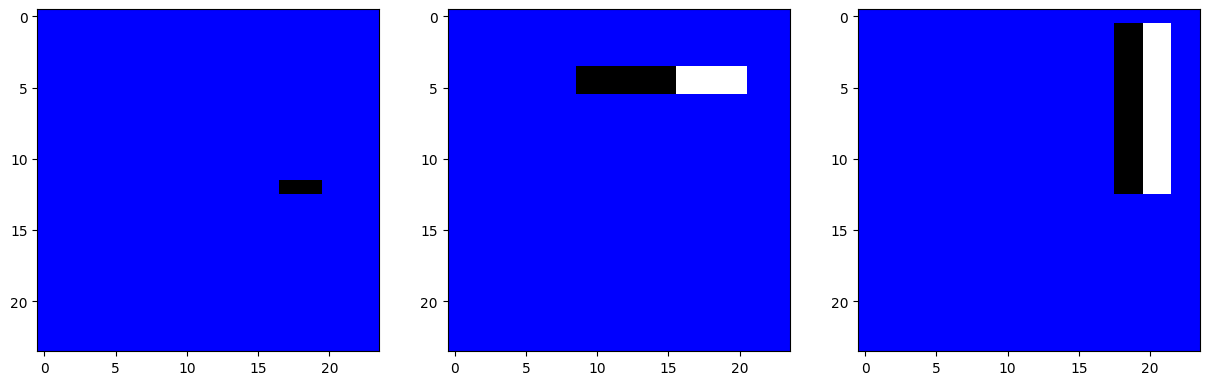

In [48]:
from skimage import io
import random
import matplotlib.pyplot as plt

blue_color = np.zeros((24, 24, 3), dtype=np.uint8)
blue_color[:, :, 2] = 255

figure,ax = plt.subplots(1, 3, figsize=(15, 5))
ax.ravel()

# need some faces
for i in range(3):
    randInt = random.randint(0, len(rects) - 1)
    ax[i].imshow(putRectangle(blue_color, rects[randInt]))

### Task 6.2: Integral Image

* Implement a function that computes the integral image of a given input image. Display the integral image for an input of you choice **(RESULT)**. 
* Compare it to the output of skimage's integral_image() function. **(RESULT)**

In [79]:
from operator import add, sub
from skimage.transform import integral_image


def addElementWise(list1, list2):
    return list(map(add, list1, list2)) 

def subElementWise(list1, list2):
    return list(map(sub, list1, list2)) 

def getIntegralImage(image):
    xRange,yRange, dim = image.shape
    integralImg = np.zeros((xRange, yRange, dim), np.uint32)
    
    integralImg[0][0] = image[0][0]
    
    for x in range(1, xRange):
        integralImg[0][x] = addElementWise(integralImg[0][x-1], image[0][x])
    
    for y in range(1, yRange):
        integralImg[y][0] = addElementWise(integralImg[y-1][0], image[y][0])
        
    for y in range(1, yRange):
        for x in range(1, xRange):
            integralImg[y][x] = subElementWise(addElementWise(addElementWise(integralImg[y][x-1],integralImg[y-1][x]),image[y][x]),integralImg[y-1][x-1])
            
    return integralImg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..576].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..576].


0.0002624988555908203
0.009569406509399414


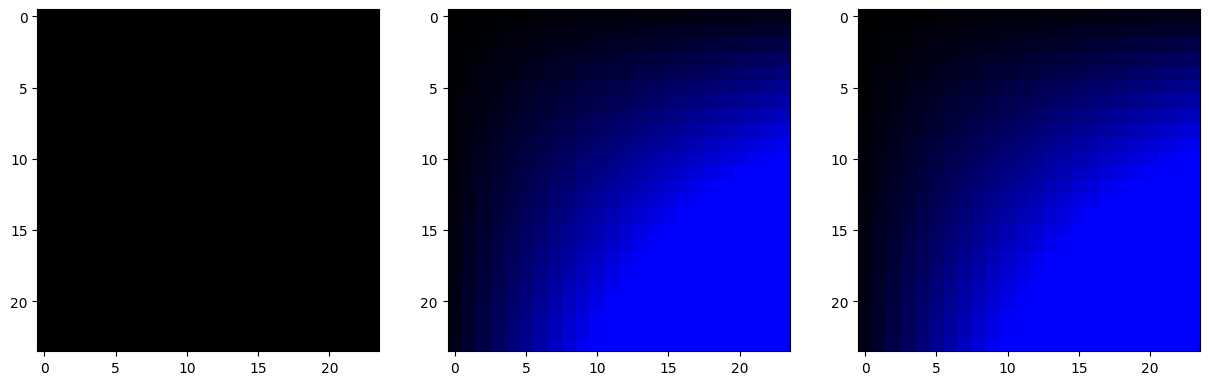

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import integral_image
import time
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax.ravel()

def integral(image):
    return integral_image(image)

ax[0].imshow(blue_color)
#execution_time = timeit.timeit(integral(blue_color), number=1) weird
starttime = time.time()
integral1 = integral_image(blue_color)
endtime = time.time()

print((endtime-starttime))
ax[1].imshow(integral1)
starttime = time.time()
integral2 = getIntegralImage(blue_color)
ax[2].imshow(integral2)
endtime = time.time()

print((endtime-starttime)) # my version is way slower. Mayby use symmetry?

### Task 6.3: AdaBoosting

* Implement the AdaBoost algorithm as outlined in the paper (https://www.face-rec.org/algorithms/Boosting-Ensemble/16981346.pdf).
* Train a 20-feature classifier using these datasets:
    - TinyFace for low resolution face images: https://qmul-tinyface.github.io/
    - CIFAR10 for negative samples: https://www.cs.toronto.edu/~kriz/cifar.html
* Test your classifier and report the results for different thresholds **(RESULTS)**

In [ ]:
# Get the data

# Get TinyFace using for example gdown
# !pip install gdown
# !mkdir data
# !cd data
# !gdown 1xTZc7lNmWN33ECO2AKH6FycGdiqIK7W0
# !unzip tinyface.zip

# TODO: Data Loading and simple preprocessing:
# Prepare (some) TinyFace samples for face data and use CIFAR10 samples for non-face data
# suggested cropping/resizing to 16x16 + 

In [ ]:
# code here

## Congratz, you made it! :)